<a href="https://colab.research.google.com/github/AlbertoTavares13/WordCloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nuvem de palavras a partir de posts no Reddit

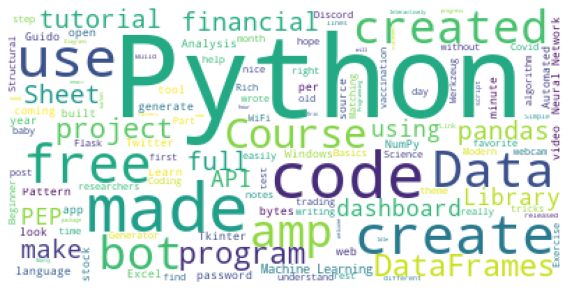

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import requests

subreddit = 'python'    # <<<============= mudar aqui tópico de busca
limit = 100
timeframe = 'month'
listing = 'top'
  
def get_reddit(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('Um erro ocorreu!')
    return request.json()
 
def get_post_titles(r):
    '''
    Pega os posts
    '''
    posts = []
    for post in r['data']['children']:
        x = post['data']['title']
        posts.append(x)
    return posts

r = get_reddit(subreddit,listing,limit,timeframe)
posts = get_post_titles(r)

# Nuvem de palavras
wc = WordCloud(background_color="white", max_words=2000, contour_width=1)

# inclui as palavras na nuvem
tweets_texts = ' '.join(posts) # converte lista de textos em um único texto
wc.generate(tweets_texts)

# mostra a nuvem de palavras
plt.figure(figsize = (10,10))
plt.imshow(wc); 
plt.axis("off");